In [16]:
# Jonathan Plavnik, CMOR220, Fall 2025, Project 9
# Project_optional_kaprekaer.ipynb
'''For this project, you are asked to create a Python code that can perform the Kaprekar Process
for an arbitrary number of digits. This function should run the process for all numbers with the
same number of digits, except for the disallowed numbers (those with all of the digits the same like
22222 or 999999999)'''
# Last modified: December 4, 2025

# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [17]:
def dis(x):
  # list of inputs: x num digits
  # list of outputs: number which is x 1's
  number = 0
  for i in range(x):
    number += 10**i
  return number

In [18]:
def quest(x, maxiter):
  # list of inputs: x num digits, maxiter number of iterations that will be run
  # list of puts: matrix containing starting digit and progression through maxiter iterations

  # create list of all numbers not allowed
  d = dis(x)
  disallowed =[d * i for i in range(1, 10)]
  all_nums = np.arange(10**(x-1), 10**x)

  mask = ~np.isin(all_nums, disallowed)
  filtered = all_nums[mask]


  # initialize matrix with that aforementioned list
  matrix = np.zeros((len(filtered), maxiter+1))
  matrix[:, 0] = filtered

  # go through run kaprekar on each of the numbers and add to matrix
  for r, n in enumerate(filtered):
        matrix[r, :] = kaprekar(n, maxiter, x)
  #print(matrix) accuracy check

  return matrix





In [19]:
def kaprekar(start, maxiter, x):
    # list of inputs: start starting integer, maxiter num iterations as given, x number of digits
    # list of outputs: row array in matrix showing progression of numbers for that starting digit

    row = np.zeros(maxiter + 1, dtype=int)
    row[0] = start

    for i in range(1, maxiter + 1):
        # leading zeroes to ensure correct num digits
        s = f"{row[i-1]:0{x}d}"
        big = int("".join(sorted(s, reverse=True)))
        small = int("".join(sorted(s)))
        row[i] = big - small

    return row

In [20]:
quest(4, 8)

array([[1000.,  999., 8991., ..., 6174., 6174., 6174.],
       [1001., 1089., 9621., ..., 6174., 6174., 6174.],
       [1002., 2088., 8532., ..., 6174., 6174., 6174.],
       ...,
       [9996., 2997., 7173., ..., 6174., 6174., 6174.],
       [9997., 1998., 8082., ..., 6174., 6174., 6174.],
       [9998.,  999., 8991., ..., 6174., 6174., 6174.]])

In [21]:
def plot_kaprekar_paths(x, maxiter):
    # list of inputs: x num digits, maxiter number of iterations
    # list of outputs: none

    # call quest to get matrix
    paths = quest(x, maxiter)
    iterations = np.arange(maxiter + 1)


    plt.figure(figsize=(8, 6))

    # plot
    for row in paths:
        plt.plot(iterations, row, marker='o', markersize=2, linewidth=0.5)

    plt.title(f"Kaprekar Paths for all {x}-digit integers")
    plt.xlabel("Iteration")
    plt.ylabel("Integer Value")
    plt.xlim(0, maxiter)
    plt.tight_layout()
    plt.show()


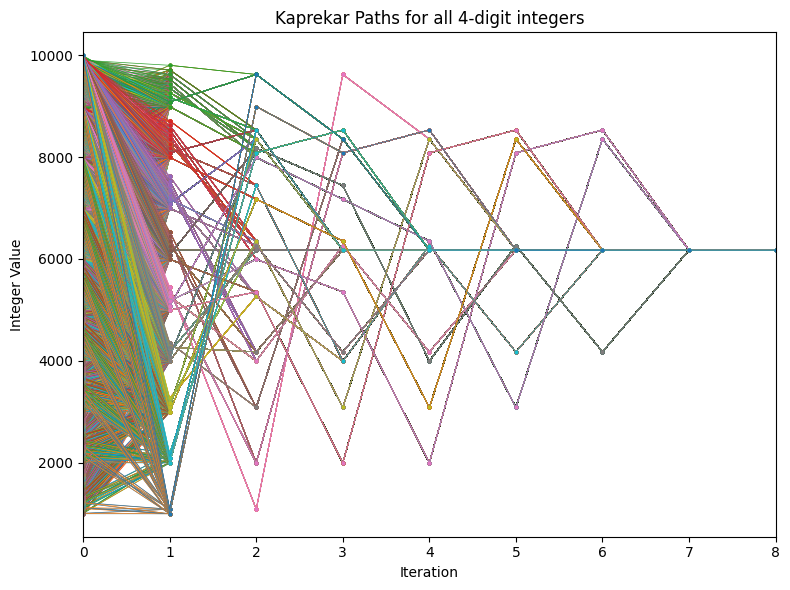

'\nThere are no krapekar constants for 5 digit numbers, only holes. They are as follows\n{53955, 59994}, {71973, 83952, 74943, 62964}, and {75933, 63954, 61974, 82962}\n'

In [22]:
# main
plot_kaprekar_paths(4, 8)


# Response to questions
'''
There are no krapekar constants for 5 digit numbers, only holes. They are as follows
{53955, 59994}, {71973, 83952, 74943, 62964}, and {75933, 63954, 61974, 82962}
'''

In [ ]:
plot_kaprekar_paths(5, 12)